<a href="https://colab.research.google.com/github/ariiibob/KNOU_project/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%EC%9D%B4%ED%95%B4_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
pip install pandas nltk wordcloud matplotlib

In [3]:
import pandas as pd

# 기사 제목 20~30개 예시 (직접 본문 데이터로 교체 가능)
titles = [
    "코엑스에서 「닌텐도 스위치 2 체험 이벤트」 개최!",
    "닌텐도 스위치2 올인원 케이스…최고의 수납력, 가격은 부담",
    "크래프톤, ‘딩컴’ 닌텐도 스위치 출시 확정 및 사전판매 개시",
    "그라비티, '게임 오브 라이프 포 닌텐도 스위치' 아시아 퍼블리싱 계약",
    "닌텐도 스위치에서 슈퍼 마리오 갤럭시와 슈퍼 마리오 갤럭시 2를 만나보세요",
    "닌텐도 스위치2, USB-C 포트 락…'부품 시장 독점' 비난 목소리 커져",
    "닌텐도 스위치2, 완벽하지만 '이것'이 빠져…만족감 감소",
    "CFK, 귀여운 토끼들의 대모험 '라핀' 닌텐도 스위치에서 즐기자",
    "게임피아, PS5‧닌텐도 스위치 버전 ‘하늘의 궤적 the 1st’ 패키지 출시",
    "'나이트메어: 더 루나틱' 닌텐도 스위치 예약 시작…도쿄게임쇼 참가",
    "바이오하자드 레퀴엠, 닌텐도 스위치 2 출시 '원래 계획엔 없었다'",
    "슈퍼 마리오 브라더스 원더, 스위치2 버전 출시…멀티플레이 모드 추가",
    "닌텐도, 버추얼 보이 게임 첫 공식 리마스터…추억의 VR이 돌아온다",
    "닌텐도 'AI 로비설, 사실무근'…의혹 제기한 日 정치인 '게시물 삭제·사과'",
    "닌텐도 스위치 『Minecraft』 최신 게임 업데이트 「The Copper Age(구리 시대)」가 오늘부터 배포 개시",
    "투 포인트 뮤지엄, 닌텐도 스위치 2로 10월 28일 발매",
    "‘닌텐도 스위치2’ 대작 라인업 러시 주의보 … 추석 여윳돈을 아껴야 할 이유",
    "게임을 넘어 일상으로···변화하는 닌텐도의 브랜드 전략",
    "닌텐도 스위치2, 더 완벽하게 즐기기…최고의 액세서리 가이드",
    "명절 준비는 닌텐도·플스?…롯데하이마트, 추석 세일 페스타",
    "슈퍼 마리오 갤럭시, 스위치·스위치2에서 리마스터 패키지로 귀환",
    "포켓몬 최초 샌드박스 '포켓몬 포코피아', 2026년 봄 닌텐도 스위치2 출격",
    "아산교육지원청, ‘닌텐도 스위치 배구’ 최우수상 수상… 전국 장애학생 e페스티벌서 빛난 실력",
    "팩맨 월드 2 리팩, 닌텐도스위치 패키지 선주문 판매 9월 17일 시작",
    "日닌텐도, 싱가포르 자회사 설립…동남아 사업 확대 가속화"
]

df = pd.DataFrame(titles, columns=["title"])

In [4]:
positive_words = ["최고", "완벽", "만족", "귀여운", "추가", "추억", "최신", "대작", "귀환", "출격", "확대"]
negative_words = ["없었다", "사과", "부담", "의혹", "비난", "독점", "감소"]


In [5]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# 제목을 단어로 분리
df["tokens"] = df["title"].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
word_scores = {}

for tokens in df["tokens"]:
    for word in tokens:
        score = 0
        if word in positive_words:
            score = 1
        elif word in negative_words:
            score = -1

        if word not in word_scores:
            word_scores[word] = score
        else:
            word_scores[word] += score


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    score = word_scores.get(word, 0)
    if score > 0:
        return "blue"      # 긍정
    elif score < 0:
        return "red"       # 부정
    else:
        return "gray"      # 중립


In [8]:
!apt-get install fonts-nanum -qq > /dev/null

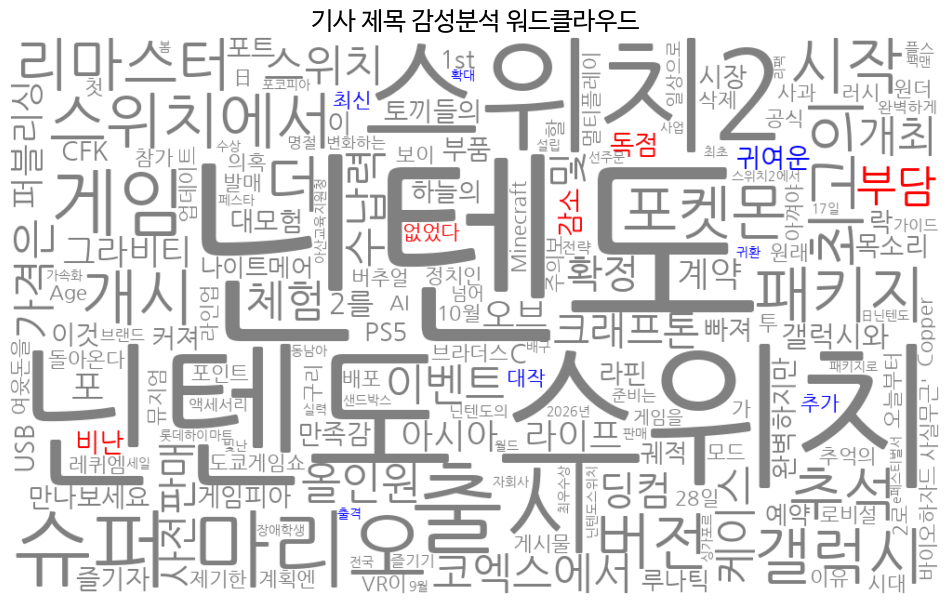

In [9]:
# 모든 단어 합치기
text = " ".join([" ".join(tokens) for tokens in df["tokens"]])

wc = WordCloud(
    font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",        # 한글일 경우 폰트 경로 지정 필요
    background_color="white",
    width=1000,
    height=600
)

wc.generate(text)

# 색상 적용
plt.figure(figsize=(12, 8))
plt.imshow(wc.recolor(color_func=color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.title("기사 제목 감성분석 워드클라우드", fontsize=18)
plt.show()


In [10]:
pip install pandas matplotlib openpyxl

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


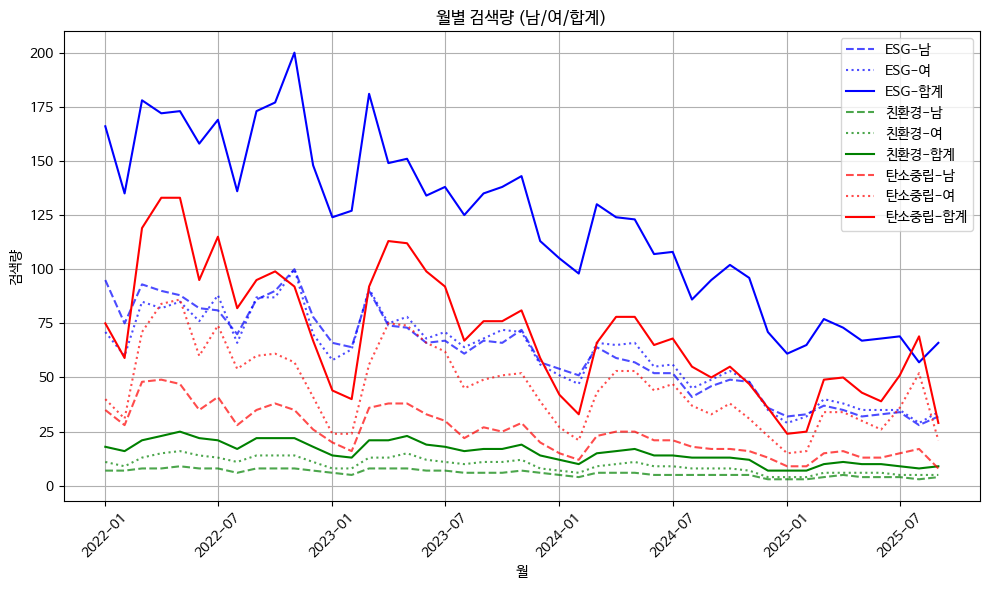

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기 (파일 경로는 본인 파일로 변경)
df_f = pd.read_excel("/content/datalab (1).xlsx", skiprows=6)
df_m = pd.read_excel("/content/datalab (2).xlsx", skiprows=6)

word_cols = ["ESG", "친환경", "탄소중립"]
df_m[word_cols] = df_m[word_cols].round(0).astype(int)
df_f[word_cols] = df_f[word_cols].round(0).astype(int)

df_t = df_m.copy()
df_t[word_cols] = df_m[word_cols] + df_f[word_cols]

df_m[["날짜", "날짜.1", "날짜.2"]] = df_m[["날짜", "날짜.1", "날짜.2"]].astype(str)
for col in ["날짜", "날짜.1", "날짜.2"]:
    df_m[col] = pd.to_datetime(df_m[col], format='%Y-%m-%d', errors='coerce')
df_f[["날짜", "날짜.1", "날짜.2"]] = df_f[["날짜", "날짜.1", "날짜.2"]].astype(str)
for col in ["날짜", "날짜.1", "날짜.2"]:
    df_f[col] = pd.to_datetime(df_f[col], format='%Y-%m-%d', errors='coerce')
df_t[["날짜", "날짜.1", "날짜.2"]] = df_t[["날짜", "날짜.1", "날짜.2"]].astype(str)
for col in ["날짜", "날짜.1", "날짜.2"]:
    df_t[col] = pd.to_datetime(df_t[col], format='%Y-%m-%d', errors='coerce')

df_mon = df_m['날짜']
df_m = df_m[['ESG', '친환경', '탄소중립']]
df_f = df_f[['ESG', '친환경', '탄소중립']]
df_t = df_t[['ESG', '친환경', '탄소중립']]
##df_t = pd.concat([df_t, df_f, df_m], axis=1)

# 색상 매핑
colors = {'ESG': 'blue', '친환경': 'green', '탄소중립': 'red'}

plt.figure(figsize=(10,6))

# 단어별로 색 고정, 성별별로 선 스타일 다르게
for word in ['ESG', '친환경', '탄소중립']:
    plt.plot(df_mon, df_m[word], '--', color=colors[word], alpha=0.7, label=f"{word}-남")
    plt.plot(df_mon, df_f[word], ':', color=colors[word], alpha=0.7, label=f"{word}-여")
    plt.plot(df_mon, df_t[word], '-', color=colors[word], label=f"{word}-합계")

plt.title("월별 검색량 (남/여/합계)")
plt.xlabel("월")
plt.ylabel("검색량")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()